# Office Hours 

- 05/21/21
- onl01-dtsc-ft-022221

## Short Discussion re: Making a Package

> - https://github.com/jirvingphd/example-simple-local-python-package

## Questions

- [Gdoc](https://docs.google.com/document/d/1TFMucUZQPhGX6eGvhUpSlrByKHswgC30SUfybcuu6Hw/edit#)

# Predicing Drug Use

## Goal

- To predict if someone is a heroin user and to use the model to gain insights into risk factors for using heroin. 

## Data

- Drug Consumption Survey: 
    - http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

- Data Set contains information about previous drug use for many classes of drugs, demographic data such as education, age, country, and personality scores for several metrics.
    - Nscore
    - Escore	
    - Oscore	
    - Ascore	
    - Cscore	
    - Impulsiveness	
    - SS

>- This dataset has already been heavily pre-processed to restore the orignal values of the dataset before the dataset providers encoded features. 
    - See `reference`>`Feature Selection - data-renaming.ipynb`" [GitHub notebook Link](https://github.com/jirvingphd/dsc-phase-3-project/blob/9258a878234c98d13a48204131fa09eb9171f445/reference/Feature%20Selection%20-%20data-renaming.ipynb)

### Imports and Functions

In [1]:
%load_ext autoreload
%autoreload 2

import project_functions as pf
# pf.get_coefficients

In [2]:
## Import pd, sns, plt, np
from project_functions.imports import *

In [3]:
## Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE,SMOTENC


## Models & Utils
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from time import time

In [4]:
# ## Changing Pandas Options to see full columns in previews and info
n=200
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
# pd.set_option('display.float_format',lambda x: f"{x:.2f}")

### Modeling Functionx (WIP)_

## Preprocessing

In [5]:
df = pd.read_csv('data/drug_use_renamed_converted.csv')
df

ID    Age  Gender                                          Education  \
0        1  35-44  Female                  Professional certificate/ diploma   
1        2  25-34    Male                                   Doctorate degree   
2        3  35-44    Male                  Professional certificate/ diploma   
3        4  18-24  Female                                     Masters degree   
4        5  35-44  Female                                   Doctorate degree   
...    ...    ...     ...                                                ...   
1880  1884  18-24  Female  Some college or university, no certificate or ...   
1881  1885  18-24    Male  Some college or university, no certificate or ...   
1882  1886  25-34  Female                                  University degree   
1883  1887  18-24  Female  Some college or university, no certificate or ...   
1884  1888  18-24    Male  Some college or university, no certificate or ...   

                  Country          Ethnicity  Nscore  Escore  Oscore  Ascore  \
0                      UK  Mixed-White/Asian    39.0    36.0    42.0    37.0   
1                      UK              White    29.0    52.0    55.0    48.0   
2                      UK              White    31.0    45.0    40.0    32.0   
3                      UK              White    34.0    34.0    46.0    47.0   
4                      UK              White    43.0    28.0    43.0    41.0   
...                   ...                ...     ...     ...     ...     ...   
1880                  USA              White    25.0    51.0    57.0    48.0   
1881                  USA              White    33.0    51.0    50.0    48.0   
1882                  USA              White    47.0    30.0    37.0    31.0   
1883                  USA              White    45.0    26.0    48.0    32.0   
1884  Republic of Ireland              White    31.0    53.0    56.0    50.0   

      Cscore  Impulsiveness       SS             Alcohol  \
0       42.0       -0.21712 -1.18084   Used in Last Week   
1       41.0       -0.71126 -0.21575   Used in Last Week   
2       34.0       -1.37983  0.40148    Used in Last Day   
3       46.0       -1.37983 -1.18084  Used in Last Month   
4       50.0       -0.21712 -0.21575  Used in Last Month   
...      ...            ...      ...                 ...   
1880    33.0        0.88113  1.92173   Used in Last Week   
1881    30.0        0.88113  0.76540   Used in Last Week   
1882    31.0        0.52975 -0.52593  Used in Last Month   
1883    22.0        1.29221  1.22470   Used in Last Week   
1884    45.0        0.88113  1.22470  Used in Last Month   

                      Amphet                    Amyl               Benzos  \
0        Used in Last Decade              Never Used  Used in Last Decade   
1        Used in Last Decade     Used in Last Decade           Never Used   
2                 Never Used              Never Used           Never Used   
3                 Never Used              Never Used    Used in Last Year   
4     Used over a Decade Ago  Used over a Decade Ago           Never Used   
...                      ...                     ...                  ...   
1880              Never Used              Never Used           Never Used   
1881              Never Used              Never Used           Never Used   
1882        Used in Last Day       Used in Last Week    Used in Last Week   
1883              Never Used              Never Used           Never Used   
1884       Used in Last Year              Never Used    Used in Last Year   

                    Caff             Cannabis                Choc  \
0       Used in Last Day           Never Used   Used in Last Week   
1       Used in Last Day   Used in Last Month    Used in Last Day   
2       Used in Last Day    Used in Last Year  Used in Last Month   
3      Used in Last Week  Used in Last Decade  Used in Last Month   
4       Used in Last Day    Used in Last Year    Used in Last Day   
...                  ...  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   Age              object 
 2   Gender           object 
 3   Education        object 
 4   Country          object 
 5   Ethnicity        object 
 6   Nscore           float64
 7   Escore           float64
 8   Oscore           float64
 9   Ascore           float64
 10  Cscore           float64
 11  Impulsiveness    float64
 12  SS               float64
 13  Alcohol          object 
 14  Amphet           object 
 15  Amyl             object 
 16  Benzos           object 
 17  Caff             object 
 18  Cannabis         object 
 19  Choc             object 
 20  Coke             object 
 21  Crack            object 
 22  Ecstasy          object 
 23  Heroin           object 
 24  Ketamine         object 
 25  LegalH           object 
 26  LSD              object 
 27  Meth             o

In [7]:
columns= {0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',
         6:'Nscore',7:'Escore',8:'Oscore',9:"Ascore",10:'Cscore',
         11:'Impulsiveness',12:'SS'}

drug_dict = {13:'Alcohol', 
              14: 'Amphet', 
              15: 'Amyl', 
              16: 'Benzos', 
              17: 'Caff', 
              18: 'Cannabis', 
              19: 'Choc', 
              20: 'Coke',
              21: 'Crack', 
              22: 'Ecstasy',
              23: 'Heroin', 
              24: 'Ketamine', 
              25: 'LegalH', 
              26: 'LSD',
              27: 'Meth',
              28: 'Mushrooms', 
              29: 'Nicotine', 
              30: "FakeDrugSemeron",
              31: 'VSA'}

all_columns = {**columns, **drug_dict}

drug_cols = list(drug_dict.values())
drug_cols

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'FakeDrugSemeron',
 'VSA']

### Identifying Columns for Preprocessing

In [8]:
object_cols = list(df.drop(columns=drug_cols).select_dtypes('object').columns)
object_cols

['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

In [9]:
## Column Lists
ordinal_cols = ['Age','Education']
onehot_cols = ['Gender','Country', 'Ethnicity']

In [10]:
df.select_dtypes('object').drop(columns=[*drug_cols,*ordinal_cols,*onehot_cols])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1885 rows x 0 columns]

## Feature Engineering

### How to treat drug cols?

- Either encode as ordinal or bin into 3 bins ('never used','previous user','current user')

In [11]:
df['Heroin'].value_counts()

Never Used                1605
Used in Last Decade         94
Used over a Decade Ago      68
Used in Last Year           65
Used in Last Month          24
Used in Last Week           16
Used in Last Day            13
Name: Heroin, dtype: int64

In [12]:
df['Heroin'].unique()

array(['Never Used', 'Used over a Decade Ago', 'Used in Last Decade',
       'Used in Last Year', 'Used in Last Week', 'Used in Last Day',
       'Used in Last Month'], dtype=object)

## Making New df for processing

In [13]:
df2 = df.copy()

### Encoding Categorical Features (Ordinal)

In [14]:
ordinal_cols

['Age', 'Education']

### Age

In [15]:
## Making age map
age_map = {'18-24': 20,
           '25-34':30,
           '35-44':40, 
           '45-54':50,
           '55-64':60,
           '65+':70}

In [16]:
df2['Age'] = df['Age'].replace(age_map)#.value_counts(dropna=False)
df2['Age'].value_counts(dropna=False)

20    643
30    481
40    356
50    294
60     93
70     18
Name: Age, dtype: int64

### Education

In [17]:
df['Education'].value_counts(dropna=False)

Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       270
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: Education, dtype: int64

In [18]:
education_map = {"Left school before 16 years":0, 
                 "Left school at 16 years":1, 
                 "Left school at 17 years":2,
                 "Left school at 18 years":3,
                 "Some college or university, no certificate or degree":4,
                 "Professional certificate/ diploma":5,
                 "University degree":6, "Masters degree":7, "Doctorate degree":8}

df2["Education"] = df['Education'].replace(education_map)
df2['Education'].value_counts(dropna=False)

4    506
6    480
7    283
5    270
3    100
1     99
8     89
2     30
0     28
Name: Education, dtype: int64

In [19]:
df2

ID  Age  Gender  Education              Country          Ethnicity  \
0        1   40  Female          5                   UK  Mixed-White/Asian   
1        2   30    Male          8                   UK              White   
2        3   40    Male          5                   UK              White   
3        4   20  Female          7                   UK              White   
4        5   40  Female          8                   UK              White   
...    ...  ...     ...        ...                  ...                ...   
1880  1884   20  Female          4                  USA              White   
1881  1885   20    Male          4                  USA              White   
1882  1886   30  Female          6                  USA              White   
1883  1887   20  Female          4                  USA              White   
1884  1888   20    Male          4  Republic of Ireland              White   

      Nscore  Escore  Oscore  Ascore  Cscore  Impulsiveness       SS  \
0       39.0    36.0    42.0    37.0    42.0       -0.21712 -1.18084   
1       29.0    52.0    55.0    48.0    41.0       -0.71126 -0.21575   
2       31.0    45.0    40.0    32.0    34.0       -1.37983  0.40148   
3       34.0    34.0    46.0    47.0    46.0       -1.37983 -1.18084   
4       43.0    28.0    43.0    41.0    50.0       -0.21712 -0.21575   
...      ...     ...     ...     ...     ...            ...      ...   
1880    25.0    51.0    57.0    48.0    33.0        0.88113  1.92173   
1881    33.0    51.0    50.0    48.0    30.0        0.88113  0.76540   
1882    47.0    30.0    37.0    31.0    31.0        0.52975 -0.52593   
1883    45.0    26.0    48.0    32.0    22.0        1.29221  1.22470   
1884    31.0    53.0    56.0    50.0    45.0        0.88113  1.22470   

                 Alcohol                  Amphet                    Amyl  \
0      Used in Last Week     Used in Last Decade              Never Used   
1      Used in Last Week     Used in Last Decade     Used in Last Decade   
2       Used in Last Day              Never Used              Never Used   
3     Used in Last Month              Never Used              Never Used   
4     Used in Last Month  Used over a Decade Ago  Used over a Decade Ago   
...                  ...                     ...                     ...   
1880   Used in Last Week              Never Used              Never Used   
1881   Used in Last Week              Never Used              Never Used   
1882  Used in Last Month        Used in Last Day       Used in Last Week   
1883   Used in Last Week              Never Used              Never Used   
1884  Used in Last Month       Used in Last Year              Never Used   

                   Benzos                Caff             Cannabis  \
0     Used in Last Decade    Used in Last Day           Never Used   
1              Never Used    Used in Last Day   Used in Last Month   
2              Never Used    Used in Last Day    Used in Last Year   
3       Used in Last Year   Used in Last Week  Used in Last Decade   
4              Never Used    Used in Last Day    Used in Last Year   
...                   ...                 ...                  ...   
1880           Never Used  Used in Last Month    Used in Last Week   
1881           Never Used   Used in Last Week    Used in Last Year   
1882    Used in Last Week    Used in Last Day     Used in Last Day   
1883           Never Used    Used in Last Day     Used in Last Day   
1884    Used in Last Year    Used in Last Day    Used in Last Year   

                    Choc                 Coke       Crack  \
0      Used in Last Week           Never Used  Never Used   
1       Used in Last Day    Used in Last Year  Never Used   
2     Used in Last Month           Never Used  Never Used   
3     Used in Last Month  Used in Last Decade  Never Used   
4       Used in Last Day           Never Used  Never Used   
...                  ...                  ...         ...   
1880  Used in Last Month 

### Binning Drug Use

In [20]:
druguse_cat_map = {'Never Used':'Non-User' , 
 'Used over a Decade Ago': 'Non-User',
 'Used in Last Decade':"User" ,
 'Used in Last Year': "User",
 'Used in Last Week': "User", 
 'Used in Last Day': "User",
 'Used in Last Month':"User"}
druguse_cat_map

{'Never Used': 'Non-User',
 'Used over a Decade Ago': 'Non-User',
 'Used in Last Decade': 'User',
 'Used in Last Year': 'User',
 'Used in Last Week': 'User',
 'Used in Last Day': 'User',
 'Used in Last Month': 'User'}

In [21]:
## Remapping Drug Use columns to binary
drug_features = drug_cols.copy()
drug_features.remove('Heroin')
for col in drug_features:
    df2[col] = df[col].replace(druguse_cat_map)
#     display(df2[col].value_counts(normalize=True, dropna=False))

#  📓**A: swapping out engineered features**

### Making a Binary and Multi-Label Drug Use Target for Heroin

In [22]:
df2['Heroin'].value_counts(1)

Never Used                0.851459
Used in Last Decade       0.049867
Used over a Decade Ago    0.036074
Used in Last Year         0.034483
Used in Last Month        0.012732
Used in Last Week         0.008488
Used in Last Day          0.006897
Name: Heroin, dtype: float64

In [23]:
df2['Heroin_binary'] = df['Heroin'].map(druguse_cat_map)
df2['Heroin_binary'].value_counts(1,dropna=False)

Non-User    0.887533
User        0.112467
Name: Heroin_binary, dtype: float64

In [24]:
## REmappign target to 3 classes
multi_label_map = {'Never Used':'Non-User' , 
 'Used over a Decade Ago': 'Former User',
 'Used in Last Decade':'Former User' ,
 'Used in Last Year': "User",
 'Used in Last Week': "User", 
 'Used in Last Day': "User",
 'Used in Last Month':"User"}


df2['Heroin_multi'] = df['Heroin'].map(multi_label_map)
df2['Heroin_multi'].value_counts(1,dropna=False)

Non-User       0.851459
Former User    0.085942
User           0.062599
Name: Heroin_multi, dtype: float64

## Preprocessing

In [25]:
df2.head(2)

ID  Age  Gender  Education Country          Ethnicity  Nscore  Escore  \
0   1   40  Female          5      UK  Mixed-White/Asian    39.0    36.0   
1   2   30    Male          8      UK              White    29.0    52.0   

   Oscore  Ascore  Cscore  Impulsiveness       SS Alcohol Amphet      Amyl  \
0    42.0    37.0    42.0       -0.21712 -1.18084    User   User  Non-User   
1    55.0    48.0    41.0       -0.71126 -0.21575    User   User      User   

     Benzos  Caff  Cannabis  Choc      Coke     Crack   Ecstasy      Heroin  \
0      User  User  Non-User  User  Non-User  Non-User  Non-User  Never Used   
1  Non-User  User      User  User      User  Non-User      User  Never Used   

   Ketamine    LegalH       LSD      Meth Mushrooms Nicotine FakeDrugSemeron  \
0  Non-User  Non-User  Non-User  Non-User  Non-User     User        Non-User   
1      User  Non-User      User      User  Non-User     User        Non-User   

        VSA Heroin_binary Heroin_multi  
0  Non-User      Non-User     Non-User  
1  Non-User      Non-User     Non-User

In [26]:
df2['Heroin_binary']

0       Non-User
1       Non-User
2       Non-User
3       Non-User
4       Non-User
          ...   
1880    Non-User
1881    Non-User
1882    Non-User
1883    Non-User
1884    Non-User
Name: Heroin_binary, Length: 1885, dtype: object

In [27]:
## Specifying root names of types of features to loop through and filter out from df
BINARY_TARGET = False


drop_cols = ['ID',"Heroin"]

if BINARY_TARGET:
    target='Heroin_binary'
    drop_cols.append('Heroin_multi')
    target_map = {'Non-User':0, 'User':1}
    print("Created Binary Target")
else:
    target='Heroin_multi'
    drop_cols.append('Heroin_binary')
    target_map = {'Non-User':0, 'Former User':1, 'User':2}
    print("Created Multi-Class Target")
    




y = df2[target].map(target_map).copy()
X = df2.drop(columns=[target,*drop_cols]).copy()
y.value_counts(1,dropna=False)

Created Multi-Class Target


0    0.851459
1    0.085942
2    0.062599
Name: Heroin_multi, dtype: float64

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train

Age  Gender  Education Country Ethnicity  Nscore  Escore  Oscore  \
1135   30  Female          6   Other     White    39.0    26.0    46.0   
1128   20    Male          4   Other     White    40.0    41.0    45.0   
651    20    Male          4     USA     White    29.0    44.0    46.0   
170    50    Male          1      UK     White    49.0    38.0    44.0   
1176   30  Female          7     USA     White    55.0    43.0    57.0   
...   ...     ...        ...     ...       ...     ...     ...     ...   
841    30  Female          4     USA     White    41.0    37.0    47.0   
1567   30  Female          7      UK     White    26.0    48.0    43.0   
564    50  Female          7      UK     White    39.0    34.0    47.0   
1047   20  Female          4     USA     White    46.0    43.0    55.0   
1539   30    Male          4     USA     White    44.0    18.0    48.0   

      Ascore  Cscore  Impulsiveness       SS Alcohol    Amphet      Amyl  \
1135    47.0    32.0       -0.21712 -0.84637    User  Non-User  Non-User   
1128    43.0    27.0        1.29221  0.76540    User      User      User   
651     44.0    42.0        1.29221  0.40148    User  Non-User  Non-User   
170     44.0    41.0        0.88113  0.40148    User  Non-User  Non-User   
1176    24.0    32.0        1.86203  1.92173    User      User  Non-User   
...      ...     ...            ...      ...     ...       ...       ...   
841     36.0    40.0       -1.37983  0.07987    User  Non-User  Non-User   
1567    42.0    42.0        0.88113 -0.84637    User  Non-User      User   
564     47.0    36.0       -0.71126 -0.84637    User  Non-User  Non-User   
1047    53.0    37.0        0.88113  0.76540    User      User  Non-User   
1539    34.0    26.0        0.88113  0.76540    User      User  Non-User   

        Benzos  Caff  Cannabis  Choc      Coke     Crack   Ecstasy  Ketamine  \
1135  Non-User  User  Non-User  User  Non-User  Non-User  Non-User  Non-User   
1128      User  User      User  User      User      User      User      User   
651   Non-User  User      User  User  Non-User  Non-User  Non-User  Non-User   
170       User  User      User  User      User  Non-User  Non-User  Non-User   
1176      User  User      User  User      User  Non-User  Non-User  Non-User   
...        ...   ...       ...   ...       ...       ...       ...       ...   
841       User  User      User  User  Non-User  Non-User  Non-User  Non-User   
1567  Non-User  User      User  User  Non-User  Non-User  Non-User  Non-User   
564   Non-User  User  Non-User  User  Non-User  Non-User  Non-User  Non-User   
1047      User  User      User  User      User  Non-User      User      User   
1539      User  User      User  User      User      User      User      User   

        LegalH       LSD      Meth Mushrooms  Nicotine FakeDrugSemeron  \
1135  Non-User  Non-User  Non-User  Non-User  Non-User        Non-User   
1128      User      User  Non-User      User      User        Non-User   
651       User  Non-User  Non-User      User      User        Non-User   
170   Non-User  Non-User      User  Non-User  Non-User        Non-User   
1176      User  Non-User      User  Non-User      User        Non-User   
...        ...       ...       ...       ...       ...             ...   
841   Non-User  Non-User  Non-User  Non-User  Non-User        Non-User   
1567  Non-User  Non-User  Non-User  Non-User      User        Non-User   
564   Non-User  Non-User  Non-User  Non-User  Non-User        Non-User   
1047      User      User  Non-User      User      User        Non-User   
1539      User      User      User      User      User        Non-User   

           VSA  
1135  Non-User  
1128      User  
651   Non-User  
170   Non-User  
1176      User  
...        ...  
841   Non-User  
1567  Non-User  
564   Non-User  
1047      User  
1539      User  

[1413 rows x 30 columns]

In [29]:
from sklearn import set_config
set_config(display='diagram')

In [30]:
## saving list of numeric vs categorical feature
num_cols = list(X_train.select_dtypes('number').columns)
cat_cols = list(X_train.select_dtypes('object').columns)

## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,drop='if_binary'))
])

print('# of num_cols:',len(num_cols))
print('# of cat_cols:',len(cat_cols))

# of num_cols: 9
# of cat_cols: 21


In [31]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Education', 'Nscore', 'Escore',
                                  'Oscore', 'Ascore', 'Cscore', 'Impulsiveness',
                                  'SS']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 ['Gender', 'Country', 'Ethnicity', 'Alcohol',
                                  'Amphet', 'Amyl', 'Benzos', 'Caff',
                                  'Cannabis', 'Choc', 'Coke', 'Crack',
                                  'Ecstasy', 'Ketamine', 'LegalH', 'LSD',
                                  'Meth', 'Mushrooms', 'Nicotine',
                                  'FakeDrugSemeron', 'VSA'])])

In [32]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

## Use the encoder's .get_feature_names
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features

In [33]:
## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)

## Tranform X_train and X_test and make into DataFrames
X_train_df

Age  Education    Nscore    Escore    Oscore    Ascore    Cscore  \
1135 -0.277881   0.554883  0.356826 -2.040768  0.042398  0.637201 -1.381953   
1128 -1.060045  -0.584724  0.466220  0.189283 -0.108506  0.027507 -2.104908   
651  -1.060045  -0.584724 -0.737110  0.635294  0.042398  0.179931  0.063956   
170   1.286446  -2.294134  1.450762 -0.256727 -0.259410  0.179931 -0.080635   
1176 -0.277881   1.124686  2.107123  0.486624  1.702348 -2.868536 -1.381953   
...        ...        ...       ...       ...       ...       ...       ...   
841  -0.277881  -0.584724  0.575613 -0.405397  0.193303 -1.039456 -0.225226   
1567 -0.277881   1.124686 -1.065291  1.229974 -0.410315 -0.124916  0.063956   
564   1.286446   1.124686  0.356826 -0.851407  0.193303  0.637201 -0.803590   
1047 -1.060045  -0.584724  1.122581  0.486624  1.400539  1.551741 -0.658999   
1539 -0.277881  -0.584724  0.903794 -3.230129  0.344207 -1.344303 -2.249499   

      Impulsiveness        SS  Gender_Male  Country_Australia  Country_Canada  \
1135      -0.236190 -0.866412          0.0                0.0             0.0   
1128       1.336747  0.789456          1.0                0.0             0.0   
651        1.336747  0.415579          1.0                0.0             0.0   
170        0.908343  0.415579          1.0                0.0             0.0   
1176       1.930581  1.977422          0.0                0.0             0.0   
...             ...       ...          ...                ...             ...   
841       -1.447900  0.085170          0.0                0.0             0.0   
1567       0.908343 -0.866412          0.0                0.0             0.0   
564       -0.751154 -0.866412          0.0                0.0             0.0   
1047       0.908343  0.789456          0.0                0.0             0.0   
1539       0.908343  0.789456          1.0                0.0             0.0   

      Country_New Zealand  Country_Other  Country_Republic of Ireland  \
1135                  0.0            1.0                          0.0   
1128                  0.0            1.0                          0.0   
651                   0.0            0.0                          0.0   
170                   0.0            0.0                          0.0   
1176                  0.0            0.0                          0.0   
...                   ...            ...                          ...   
841                   0.0            0.0                          0.0   
1567                  0.0            0.0                          0.0   
564                   0.0            0.0                          0.0   
1047                  0.0            0.0                          0.0   
1539                  0.0            0.0                          0.0   

      Country_UK  Country_USA  Ethnicity_Asian  Ethnicity_Black  \
1135         0.0          0.0              0.0              0.0   
1128         0.0          0.0              0.0              0.0   
651          0.0          1.0              0.0              0.0   
170          1.0          0.0              0.0              0.0   
1176         0.0          1.0              0.0              0.0   
...          ...          ...              ...              ...   
841          0.0          1.0              0.0              0.0   
1567         1.0          0.0              0.0              0.0   
564          1.0          0.0              0.0              0.0   
1047         0.0          1.0              0.0              0.0   
1539         0.0          1.0              0.0              0.0   

      Ethnicity_Mixed-Black/Asian  Ethnicity_Mixed-White/Asian  \
1135                          0.0                          0.0   
1128                          0.0                          0.0   
651                           0.0                          0.0   
170                           0.0                          0.0   
1176                          0.0                          0.0   
...        

In [34]:
y.value_counts(1)

0    0.851459
1    0.085942
2    0.062599
Name: Heroin_multi, dtype: float64

### Q re: filling in training and test data with a column's distributin

In [35]:
age_dist = dict(X_train_df['Age'].value_counts(1))#d.values\
age_dist

{-1.060045015562271: 0.3361641896673744,
 -0.2778812521212846: 0.25831564048124556,
 0.5042825113197018: 0.19037508846426043,
 1.2864462747606882: 0.1542816702052371,
 2.0686100382016748: 0.050955414012738856,
 2.8507738016426614: 0.009907997169143666}

In [36]:
X_train_df['Age'].fillna(np.random.choice(list(age_dist.keys()),
                                          p=list(age_dist.values())))

X_test_df['Age'].fillna(np.random.choice(list(age_dist.keys()),
                                          p=list(age_dist.values())))

94      1.286446
1635    1.286446
1304   -0.277881
906    -1.060045
1596   -0.277881
          ...   
44     -0.277881
1447   -0.277881
1126   -1.060045
154    -1.060045
300     0.504283
Name: Age, Length: 472, dtype: float64

### Question re: doing EDA after preprepocessing data

In [37]:
## Just concat the X and y data 
df_eda = pd.concat([X_train_df,X_test_df],axis=0)
df_eda['Heroin'] = pd.concat([y_train,y_test])
df_eda

Age  Education    Nscore    Escore    Oscore    Ascore    Cscore  \
1135 -0.277881   0.554883  0.356826 -2.040768  0.042398  0.637201 -1.381953   
1128 -1.060045  -0.584724  0.466220  0.189283 -0.108506  0.027507 -2.104908   
651  -1.060045  -0.584724 -0.737110  0.635294  0.042398  0.179931  0.063956   
170   1.286446  -2.294134  1.450762 -0.256727 -0.259410  0.179931 -0.080635   
1176 -0.277881   1.124686  2.107123  0.486624  1.702348 -2.868536 -1.381953   
...        ...        ...       ...       ...       ...       ...       ...   
44   -0.277881   0.554883 -1.065291  1.378644  0.495112  1.246894  0.931501   
1447 -0.277881   1.124686 -1.065291  1.081304  0.947825 -1.039456  1.365274   
1126 -1.060045  -0.584724  1.122581 -2.189438 -0.712124  1.094471 -1.381953   
154  -1.060045  -0.584724  2.544698 -1.446088  0.796921 -0.429763  0.642319   
300   0.504283   1.694490  0.575613 -0.405397 -0.712124  0.637201  0.931501   

      Impulsiveness        SS  Gender_Male  Country_Australia  Country_Canada  \
1135      -0.236190 -0.866412          0.0                0.0             0.0   
1128       1.336747  0.789456          1.0                0.0             0.0   
651        1.336747  0.415579          1.0                0.0             0.0   
170        0.908343  0.415579          1.0                0.0             0.0   
1176       1.930581  1.977422          0.0                0.0             0.0   
...             ...       ...          ...                ...             ...   
44        -0.236190  0.085170          1.0                0.0             0.0   
1447      -0.236190 -0.537205          0.0                0.0             0.0   
1126       0.908343  0.415579          1.0                0.0             0.0   
154       -0.236190  0.789456          0.0                0.0             0.0   
300       -0.751154 -0.866412          0.0                0.0             0.0   

      Country_New Zealand  Country_Other  Country_Republic of Ireland  \
1135                  0.0            1.0                          0.0   
1128                  0.0            1.0                          0.0   
651                   0.0            0.0                          0.0   
170                   0.0            0.0                          0.0   
1176                  0.0            0.0                          0.0   
...                   ...            ...                          ...   
44                    0.0            0.0                          0.0   
1447                  0.0            0.0                          0.0   
1126                  0.0            0.0                          0.0   
154                   0.0            0.0                          0.0   
300                   0.0            0.0                          0.0   

      Country_UK  Country_USA  Ethnicity_Asian  Ethnicity_Black  \
1135         0.0          0.0              0.0              0.0   
1128         0.0          0.0              0.0              0.0   
651          0.0          1.0              0.0              0.0   
170          1.0          0.0              0.0              0.0   
1176         0.0          1.0              0.0              0.0   
...          ...          ...              ...              ...   
44           1.0          0.0              0.0              0.0   
1447         1.0          0.0              0.0              0.0   
1126         0.0          1.0              0.0              0.0   
154          1.0          0.0              0.0              0.0   
300          1.0          0.0              0.0              0.0   

      Ethnicity_Mixed-Black/Asian  Ethnicity_Mixed-White/Asian  \
1135                          0.0                          0.0   
1128                          0.0                          0.0   
651                           0.0                          0.0   
170                           0.0                          0.0   
1176                          0.0                          0.0   
...        

## Resampling with SMOTENC

In [38]:
y_train.value_counts(1)

0    0.851380
1    0.085633
2    0.062987
Name: Heroin_multi, dtype: float64

In [39]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# smote_feats

In [40]:
## resample training data
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_resample(X_train_df,y_train)
y_train_sm.value_counts()

1    1203
2    1203
0    1203
Name: Heroin_multi, dtype: int64

# MODELING

#### Setting `train_test_list`

In [41]:
### SAVING XY DATA TO LIST TO UNPACK
train_test_list = [X_train_sm,y_train_sm,X_test_df,y_test]

## Linear SVC

[i] Training started at 05/20/21-13:02:28:
	Training time was 0.4412 seconds.

           Train  Test  Difference
accuracy   0.85  0.78        0.07 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       402
           1       0.24      0.41      0.31        41
           2       0.27      0.34      0.30        29

    accuracy                           0.78       472
   macro avg       0.48      0.54      0.50       472
weighted avg       0.84      0.78      0.80       472



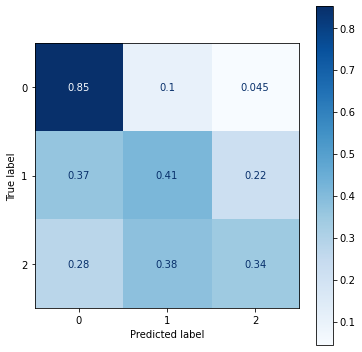

SVC(C=1, kernel='linear')

In [42]:
svc_linear = SVC(kernel='linear',C=1)
pf.fit_and_time_model(svc_linear,*train_test_list)

# 📓**A re: LogisticRegression `max_iter` & coefficients**

In [43]:
preprocessor.named_transformers_['num']

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())])

[i] Training started at 05/20/21-13:02:30:
	Training time was 0.1438 seconds.

           Train  Test  Difference
accuracy   0.83  0.77        0.06 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       402
           1       0.24      0.41      0.30        41
           2       0.25      0.41      0.31        29

    accuracy                           0.77       472
   macro avg       0.48      0.55      0.50       472
weighted avg       0.85      0.77      0.80       472



/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


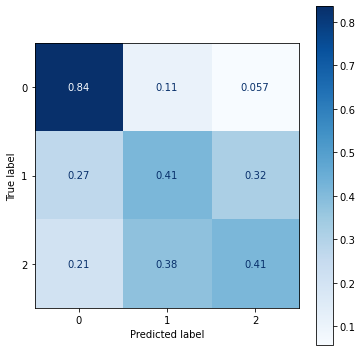

LogisticRegression()

In [44]:
logreg = LogisticRegression()
pf.fit_and_time_model(logreg,*train_test_list)

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# logreg = LogisticRegression(C=1e12,n_jobs=12)
# params = {'max_iter':[25,100,50,150],
#          'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#          }
# gridsearch = GridSearchCV(logreg,params,scoring='recall')
# gridsearch.fit(*train_test_list[:2])
# gridsearch.best_params_

In [47]:
# print(gridsearch.best_params_)
# print(gridsearch.best_score_)

# best_logreg = gridsearch.best_estimator_
# pf.fit_and_time_model(best_logreg,*train_test_list)

In [48]:
# best_logreg.coef_

In [49]:
# coeffs = pf.get_coefficients(best_logreg,X_train_sm,units='odds')
# coeffs

In [50]:
# pf.get_co

## RandomForest

[i] Training started at 05/20/21-13:02:30:
	Training time was 0.4900 seconds.

           Train  Test  Difference
accuracy    1.0  0.85        0.15 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       402
           1       0.45      0.37      0.41        41
           2       0.37      0.45      0.41        29

    accuracy                           0.85       472
   macro avg       0.58      0.58      0.58       472
weighted avg       0.85      0.85      0.85       472



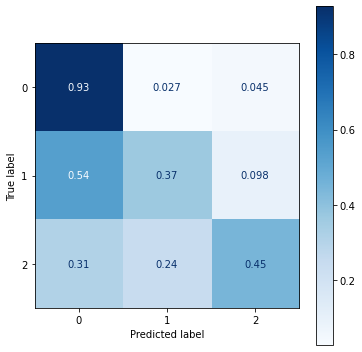

RandomForestClassifier()

In [51]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

In [52]:
pd.Series(rf.get_params())

bootstrap                    True
ccp_alpha                       0
class_weight                 None
criterion                    gini
max_depth                    None
max_features                 auto
max_leaf_nodes               None
max_samples                  None
min_impurity_decrease           0
min_impurity_split           None
min_samples_leaf                1
min_samples_split               2
min_weight_fraction_leaf        0
n_estimators                  100
n_jobs                       None
oob_score                   False
random_state                 None
verbose                         0
warm_start                  False
dtype: object

### Getting final param values/results from random forest's trees

In [53]:
tree= rf.estimators_[0]
tree.get_n_leaves()

401

In [55]:
depths = [m.get_depth() for m in rf.estimators_]
max(depths)

30

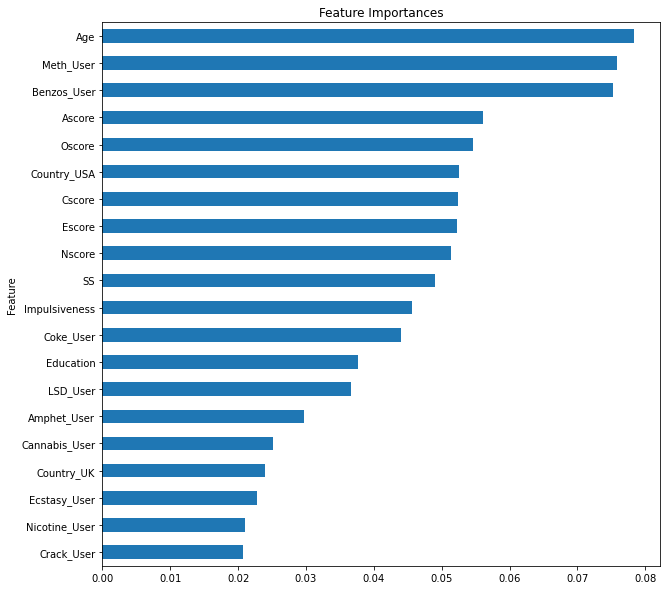

In [56]:
pf.get_importance(rf,X_test_df);

# EXPLAINING MACHINE LEARNING MODELS

## Overview

- We will discuss/demo 3 methods of interpreting machine learning models. 
    1. Using Permutation Importance (from scikit-learn)
    2. Using `SHAP` model explainers
    3. Using `LIME` instance explainers

## Permutation Importance

> Permutation Importances will iteratively shuffle the rows of a single feature at a time to asses the model's change in performance with that feature's relationship with the target disrupted. 
- https://scikit-learn.org/stable/modules/permutation_importance.html

```python
from sklearn.inspection import permutation_importance
r = permutation_importance(svc_linear, X_test_df, y_test, n_repeats=30)
r.keys()
```
- Interesting Observation: 
    - permutation_importance takes a `scoring` argument!

> "**Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model.** Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model."

In [57]:
from sklearn.inspection import permutation_importance

In [58]:
y_test.nunique()

3

In [59]:

## Adjusting  Score if multi-class
eval_metric ='f1'
if y_test.nunique() >2:
    scoring = f'{eval_metric}_macro'
else:
    scoring=eval_metric
    
    

In [60]:
## Permutation importance takes a fit mode and test data. 

r = permutation_importance(svc_linear, X_test_df, y_test,
                           n_repeats=30,scoring=scoring)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [61]:
r['importances_mean']

array([ 3.56700896e-02, -8.57755178e-03, -1.68099518e-02, -1.99475373e-02,
       -2.08529583e-02, -3.38087494e-02, -2.12862282e-02, -1.28174243e-02,
       -2.34652100e-02, -1.22598298e-02,  1.56133653e-02,  1.28249275e-02,
       -2.58723272e-04,  1.14381169e-02,  2.50244874e-05,  4.07375322e-02,
        1.39618403e-02,  3.06198838e-04,  4.89855651e-04,  0.00000000e+00,
       -8.81196092e-03, -1.68570469e-03, -2.12373000e-04, -5.78490343e-03,
       -2.59787033e-04,  9.85881681e-03, -3.07304331e-02,  5.13307567e-03,
        5.03642118e-04,  1.01696003e-02, -6.02858483e-03,  2.72036053e-02,
       -4.79059234e-03, -1.27330004e-02, -4.19287396e-02, -4.55572758e-03,
        6.15239236e-03,  5.22733788e-02, -1.24637415e-02, -2.33264001e-02,
       -2.14125214e-05, -1.36323912e-03])

In [62]:
## can make the mean importances into a series
svc_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'svc permutation importance')
svc_importances

Age                            0.035670
Education                     -0.008578
Nscore                        -0.016810
Escore                        -0.019948
Oscore                        -0.020853
Ascore                        -0.033809
Cscore                        -0.021286
Impulsiveness                 -0.012817
SS                            -0.023465
Gender_Male                   -0.012260
Country_Australia              0.015613
Country_Canada                 0.012825
Country_New Zealand           -0.000259
Country_Other                  0.011438
Country_Republic of Ireland    0.000025
Country_UK                     0.040738
Country_USA                    0.013962
Ethnicity_Asian                0.000306
Ethnicity_Black                0.000490
Ethnicity_Mixed-Black/Asian    0.000000
Ethnicity_Mixed-White/Asian   -0.008812
Ethnicity_Mixed-White/Black   -0.001686
Ethnicity_Other               -0.000212
Ethnicity_White               -0.005785
Alcohol_User                  -0.000260


In [63]:
r = permutation_importance(rf, X_test_df, y_test, n_repeats=30,scoring=scoring)
rf_importances = pd.Series(r['importances_mean'],index=X_test_df.columns,
                          name= 'rf permutation importance')
rf_importances

Age                            0.052254
Education                      0.012573
Nscore                         0.019042
Escore                        -0.026611
Oscore                         0.016711
Ascore                         0.004448
Cscore                         0.004415
Impulsiveness                  0.022055
SS                             0.013819
Gender_Male                   -0.002050
Country_Australia              0.003164
Country_Canada                -0.002491
Country_New Zealand            0.000000
Country_Other                 -0.005653
Country_Republic of Ireland    0.000000
Country_UK                     0.007705
Country_USA                    0.045235
Ethnicity_Asian                0.000000
Ethnicity_Black                0.000000
Ethnicity_Mixed-Black/Asian    0.000000
Ethnicity_Mixed-White/Asian    0.000000
Ethnicity_Mixed-White/Black    0.000000
Ethnicity_Other                0.000548
Ethnicity_White                0.003120
Alcohol_User                  -0.000173


In [64]:
embedded_importances = pf.get_importance(rf,X_test_df,plot=False)
embedded_importances.name ='rf.feature_importances_'
embedded_importances

Age                            0.078296
Education                      0.037622
Nscore                         0.051403
Escore                         0.052203
Oscore                         0.054637
Ascore                         0.056124
Cscore                         0.052357
Impulsiveness                  0.045609
SS                             0.048970
Gender_Male                    0.012101
Country_Australia              0.001331
Country_Canada                 0.002321
Country_New Zealand            0.000021
Country_Other                  0.003512
Country_Republic of Ireland    0.000537
Country_UK                     0.023912
Country_USA                    0.052494
Ethnicity_Asian                0.000332
Ethnicity_Black                0.000209
Ethnicity_Mixed-Black/Asian    0.000013
Ethnicity_Mixed-White/Asian    0.000440
Ethnicity_Mixed-White/Black    0.000253
Ethnicity_Other                0.000884
Ethnicity_White                0.002771
Alcohol_User                   0.001152


In [65]:
def compare_importances(*importances,sort_index=True,sort_col=0,show_bar=False):
    """Accepts Series of feature importances to concat.
    
    Args:
        *importances (Seires): seires to concat (recommended to pre-set names of Series)
        sort_index (bool, default=True): return series sorted by index. 
                            If False, sort seires by sort_col  #
        sort_col (int, default=0): If sort_index=False, sort df by this column #
        show_bar (bool, default=False): If show_bar, returns a pandas styler instead of df
                                        with the importances plotted as bar graphs
        
    Returns:
        DataFrame: featutre importances     
    
        """
    ## Concat Importances
    compare_importances = pd.concat(importances,axis=1)
    
    ## Sort DF by index or by sort_col
    if sort_index:
        sort_col_name = 'Index'
        compare_importances = compare_importances.sort_index()
    else:
        sort_col_name = compare_importances.columns[sort_col]
        compare_importances= compare_importances.sort_values(sort_col_name,ascending=False)
        
    ## If show bar, return pandas styler with in-cell bargraphs
    if show_bar:
        return compare_importances.style.bar().set_caption(f'Feature Importances - sorted by {sort_col_name}')
    else:
        return compare_importances

In [66]:
## Compare embedded feature importance vs permutation importance
comp = pf.compare_importances(embedded_importances,rf_importances,#svc_importances,
                          show_bar=True,sort_index=False,sort_col=0)
comp

In [67]:
## Compare embedded feature importance vs permutation importance
comp = compare_importances(embedded_importances,rf_importances,svc_importances,
                          show_bar=True,sort_col=-1,sort_index=False)
comp

## Using SHAP and Shapely Values for Model Interpretation

###  📚Shap Resources

>- SHAP (SHapley Additive exPlanations)) 
    - [Repository](https://github.com/slundberg/shap)
    - [Documentation](https://shap.readthedocs.io/en/latest/?badge=latest)
        - Install via pip or conda.
  

- SHAP uses game theory to calcualte Shapely values for each feature in the dataset. 
- Shapely values are calculated by iteratively testing each feature's contribution to the model by comparing the model's  performance with vs. without the feature. (The "marginal contribution" of the feature to the model's performance).



#### Papers, Book Excerpts, and  Blogs
- [White Paper on Shapely Values](https://arxiv.org/abs/1705.07874)
    
- [Intepretable Machine Learning Book - Section on SHAP](https://christophm.github.io/interpretable-ml-book/shap.html)
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





#### Videos/Talks:
- Explaining Machine Learning Models (in general).
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
- Understanding Shapely/SHAP Values:
    - [AI Simplified: SHAP Values in Machine Learning ](https://youtu.be/Tg8aPwPPJ9c)- (Intuitive Explanation)
    - [Explainable AI explained! | #4 SHAP  ](https://youtu.be/9haIOplEIGM)- (Math Calculation Explanation)


### How to Use SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        


- Import and initialize javascript:

```python
import shap 
shap.initjs()
```

In [68]:
import shap 
print(shap.__version__)
shap.initjs()

0.37.0


[i] Training started at 05/20/21-13:11:55:
	Training time was 0.3720 seconds.

           Train  Test  Difference
accuracy    1.0  0.85        0.15 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       402
           1       0.46      0.39      0.42        41
           2       0.31      0.38      0.34        29

    accuracy                           0.85       472
   macro avg       0.57      0.57      0.57       472
weighted avg       0.85      0.85      0.85       472



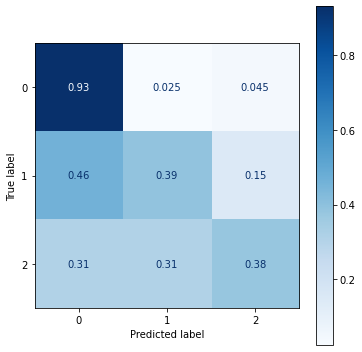

RandomForestClassifier()

In [69]:
rf = RandomForestClassifier()
pf.fit_and_time_model(rf,*train_test_list)

### To Get Expanations for Trees:



1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data
    
  

In [70]:
# importances = pf.get_importance(rf,X_train_df,top_n=30)

In [71]:
## Initialize an explainer with the model
explainer = shap.TreeExplainer(rf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_df,y_test)
len(shap_values)

3

In [72]:
shap_values[1].shape, X_test_df.shape

((472, 42), (472, 42))

### Summary Plot

```python
## For normal bar graph of importance:
shap.summary_plot(shap_values[1],X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```
  

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


>- **IMPORTANT NOTE:** You may need to slice out the correct shap_values for the target class. (by default explainer.shap_values seems to return a list for a binary classification, one set of shap values for each class).
    - This will cause issues like the summary plot having a bar with an equal amount of blue and red for each class. 
    - To fix, slice out the correct matrix from shap_values [0,1]


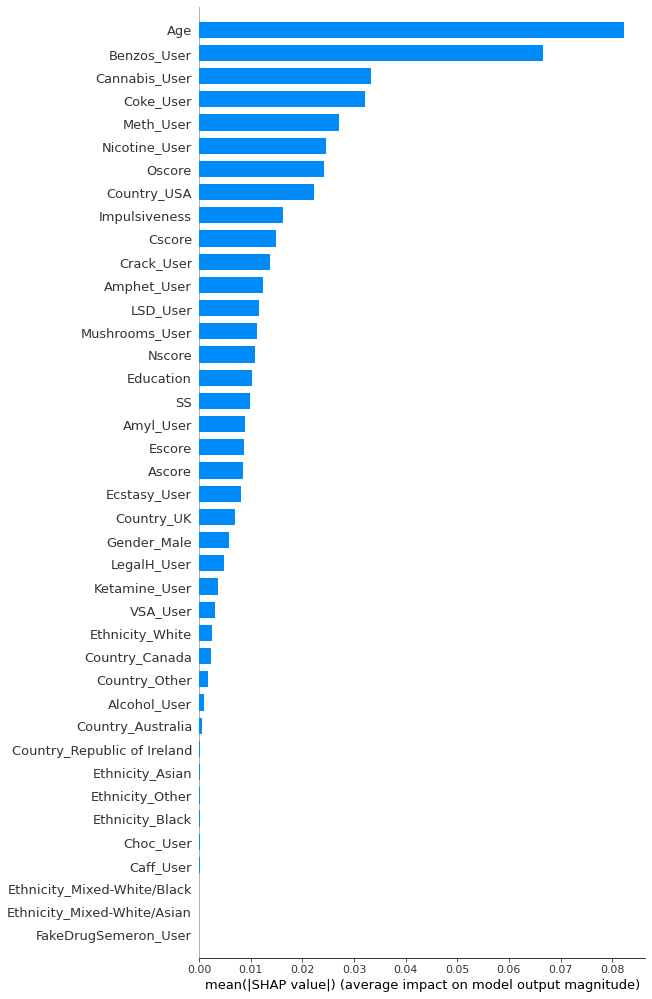

In [73]:
shap.summary_plot(shap_values[1], X_test_df,plot_type='bar',max_display=40)

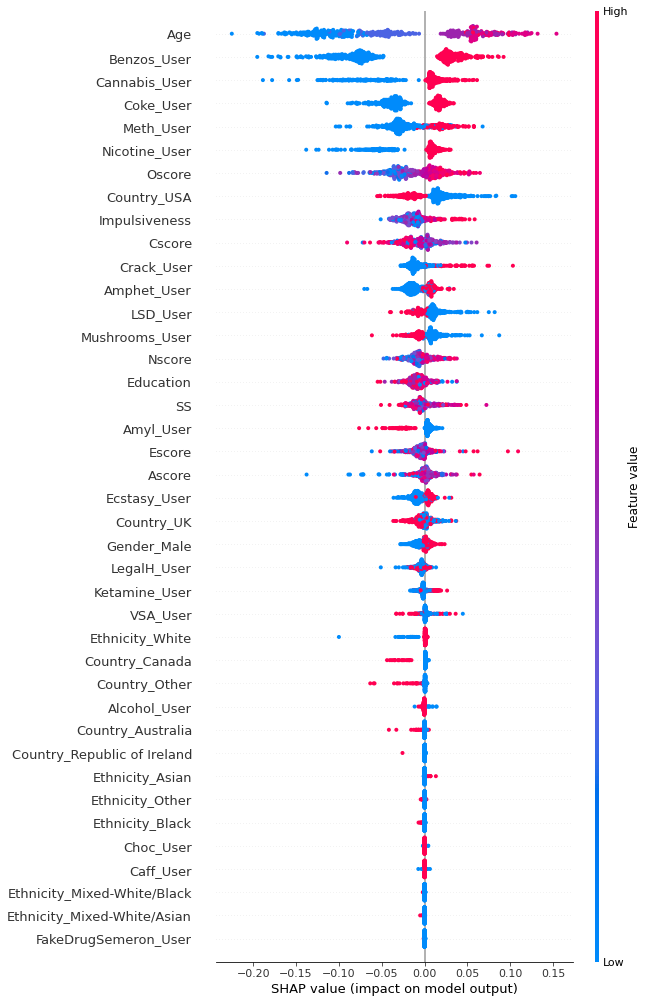

In [74]:
shap.summary_plot(shap_values[1],X_test_df,max_display=40)

### Force Plots

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row
row = np.random.choice(range(len(X_train)))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

#### Explain Individual Plot

In [75]:
target_lookup = {0:'Non-User',1:'Heroin User'}
target_lookup[0]

'Non-User'

In [76]:
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")
X_test_df.iloc[row].round(2)

- Row #: 196
Class = Non-User


Age                            0.50
Education                      0.55
Nscore                         0.47
Escore                         0.04
Oscore                        -1.16
Ascore                        -1.65
Cscore                         0.06
Impulsiveness                  0.19
SS                             0.42
Gender_Male                    0.00
Country_Australia              0.00
Country_Canada                 0.00
Country_New Zealand            0.00
Country_Other                  0.00
Country_Republic of Ireland    0.00
Country_UK                     1.00
Country_USA                    0.00
Ethnicity_Asian                0.00
Ethnicity_Black                0.00
Ethnicity_Mixed-Black/Asian    0.00
Ethnicity_Mixed-White/Asian    0.00
Ethnicity_Mixed-White/Black    0.00
Ethnicity_Other                0.00
Ethnicity_White                1.00
Alcohol_User                   1.00
Amphet_User                    1.00
Amyl_User                      0.00
Benzos_User                 

In [77]:
## Individual forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1][row],X_test_df.iloc[row])       

In [78]:
## Overall Forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1],X_test_df)       

**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


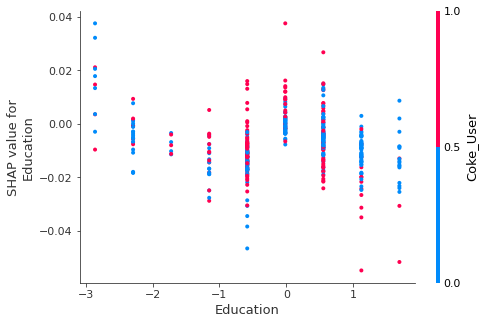

In [79]:
shap.dependence_plot('Education',shap_values[1],X_test_df)

### Using SHAP with SVMS: 

https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html**
- ~~Must run the SVC with `probability=True` to be able to use `.predict_proba`, which is needed for the `KernelExplainer`~~

[i] Training started at 05/20/21-13:12:07:
	Training time was 0.3552 seconds.

           Train  Test  Difference
accuracy   0.85  0.78        0.07 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       402
           1       0.24      0.41      0.31        41
           2       0.27      0.34      0.30        29

    accuracy                           0.78       472
   macro avg       0.48      0.54      0.50       472
weighted avg       0.84      0.78      0.80       472



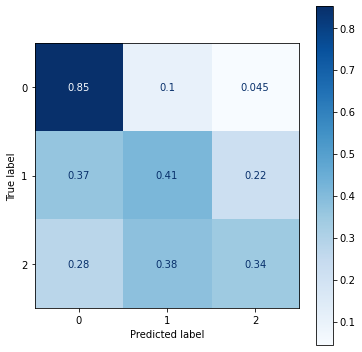

In [80]:
svc_linear = pf.fit_and_time_model(SVC(kernel='linear',C=1),#probability=True,
                                *train_test_list)

In [81]:
# pred_func = svc_linear.decision_function
X_shap = shap.sample(X_test_df,nsamples=200)
explainer = shap.KernelExplainer(svc_linear.predict,X_shap)
explainer

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [82]:
shap_values = explainer.shap_values(X_shap,nsamples=100)#, nsamples=1000)

In [83]:
shap_values.shape

(200, 42)

In [84]:
X_test_df.shape

(472, 42)

In [85]:
shap_values[0].shape

(42,)

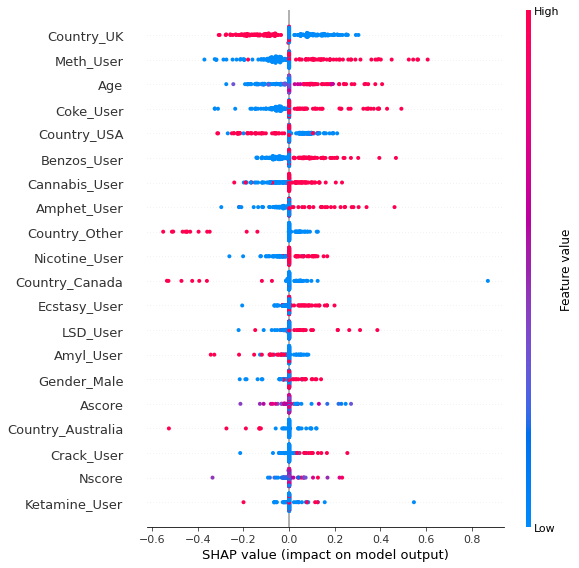

In [86]:
# # shap.force_plot(shap_values[0],X_test)
shap.summary_plot(shap_values,X_shap) 

In [87]:
# shap.summary_plot(shap_values,X_test,plot_type='bar')

## Explaining Models with LIME

>- LIME (Local Interpretable Model-Agnostic Explanations) 
    - GitHub: https://github.com/marcotcr/lime
    - [White Paper](https://arxiv.org/abs/1602.04938)

- [Blog Post:"ExplainYour Modelw ith LIME"](https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423)

In [88]:
# !pip install lime
from lime.lime_tabular import LimeTabularExplainer

In [89]:
lime_explainer =LimeTabularExplainer(
    training_data=np.array(X_test_df),
    feature_names=X_train_df.columns,
    class_names=['Non-User', 'Heroin-User'],
    mode='classification'
)

In [90]:
row = np.random.choice(range(len(X_test_df)))
print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")
# X_test_df.iloc[row].round(2)    

- Row #: 427
Class = Non-User


In [91]:
exp = lime_explainer.explain_instance(X_test_df.iloc[row], rf.predict_proba)
exp.show_in_notebook(show_table=True)

# Appendix

### Renaming Features

In [92]:
columns= {0:'ID',1:'Age',2:'Gender',3:'Education',4:'Country',5:'Ethnicity',
         6:'Nscore',7:'Escore',8:'Oscore',9:"Ascore",10:'Cscore',
         11:'Impulsiveness',12:'SS'}

drug_dict = {13:'Alcohol', 
              14: 'Amphet', 
              15: 'Amyl', 
              16: 'Benzos', 
              17: 'Caff', 
              18: 'Cannabis', 
              19: 'Choc', 
              20: 'Coke',
              21: 'Crack', 
              22: 'Ecstasy',
              23: 'Heroin', 
              24: 'Ketamine', 
              25: 'LegalH', 
              26: 'LSD',
              27: 'Meth',
              28: 'Mushrooms', 
              29: 'Nicotine', 
              30: "FakeDrugSemeron",
              31: 'VSA'}

all_columns = {**columns, **drug_dict}

drug_cols = list(drug_dict.values())
drug_cols

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'LegalH',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'FakeDrugSemeron',
 'VSA']